# Computational Social Science Project 2

#### Group members: Audrey Augenbraum, Shruti Bathia, Alex Ramiller, Ángel Mendiola Ross

The aim of this project is to develop machine learning models to predict US counties with the highest diabetes rates. 
We use data from Centers for Disease Control and Prevention (CDC) and the US Census Bureau.

In [12]:
#calling relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# importing dataset
mydata = pd.read_csv("Diabetes with Population Info by County 2017.csv")

In [14]:
# checking out the dataset
mydata.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [15]:
##checking the variable type
print (mydata.dtypes)

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                      object
Obesity_Number                                                                       object
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

In [16]:
mydata.describe()

,CountyFIPS,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
count,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,...,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,31393.605280,1.013323e+05,9.803687e+04,3295.423292,9.803687e+04,7.366104e+04,1.282022e+04,840.862422,90.346894,36.718634,...,7.412272e+04,1.906676e+04,1.549044e+04,7.827602e+04,3.809320e+04,4.018282e+04,99.439317,1.549044e+04,6850.940683,8639.495342
std,16292.078954,3.260964e+05,3.142309e+05,13032.711931,3.142309e+05,2.012548e+05,5.514027e+04,3534.196512,534.021931,300.672832,...,2.384994e+05,5.470009e+04,4.432602e+04,2.513513e+05,1.220023e+05,1.293948e+05,14.740158,4.432602e+04,19234.567636,25111.933583
min,1001.000000,7.500000e+01,6.000000e+01,0.000000,6.000000e+01,1.600000e+01,0.000000e+00,0.000000,0.000000,0.000000,...,6.900000e+01,1.900000e+01,1.200000e+01,7.100000e+01,3.600000e+01,3.100000e+01,70.800000,1.200000e+01,0.000000,10.000000
25%,19032.500000,1.121425e+04,1.090100e+04,169.750000,1.090100e+04,9.050250e+03,1.167500e+02,30.000000,0.000000,0.000000,...,8.314250e+03,2.583750e+03,2.111500e+03,8.691500e+03,4.355250e+03,4.285250e+03,93.000000,2.111500e+03,984.750000,1126.000000
50%,30024.000000,2.595050e+04,2.537900e+04,492.000000,2.537900e+04,2.161750e+04,8.380000e+02,114.000000,9.000000,0.000000,...,1.936550e+04,5.704500e+03,4.698500e+03,2.026050e+04,9.997500e+03,1.019050e+04,96.500000,4.698500e+03,2129.500000,2548.000000
75%,46105.500000,6.655225e+04,6.497525e+04,1742.500000,6.497525e+04,5.711775e+04,5.591000e+03,425.250000,48.000000,6.000000,...,4.906400e+04,1.435650e+04,1.171375e+04,5.200525e+04,2.557400e+04,2.664950e+04,100.800000,1.171375e+04,5234.000000,6314.500000
max,72153.000000,1.009805e+07,9.700372e+06,397680.000000,9.700372e+06,5.186859e+06,1.230494e+06,82699.000000,14104.000000,10609.000000,...,7.433332e+06,1.610630e+06,1.299277e+06,7.851531e+06,3.827779e+06,4.023752e+06,414.700000,1.299277e+06,561006.000000,738271.000000


In [34]:
## removing string values
mydata = mydata[~mydata['Diabetes_Number'].isin(['Suppressed'])]
mydata = mydata[~mydata['Obesity_Number'].isin(['No Data'])]
mydata = mydata[~mydata['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].isin(['-'])]

In [18]:
mydata.shape

(3141, 95)

In [19]:
## converting Diabetes_Number and Obesity_Number to int
mydata["Diabetes_Number"] = mydata["Diabetes_Number"].astype(str).astype(int)
mydata["Obesity_Number"] = mydata["Obesity_Number"].astype(str).astype(int)

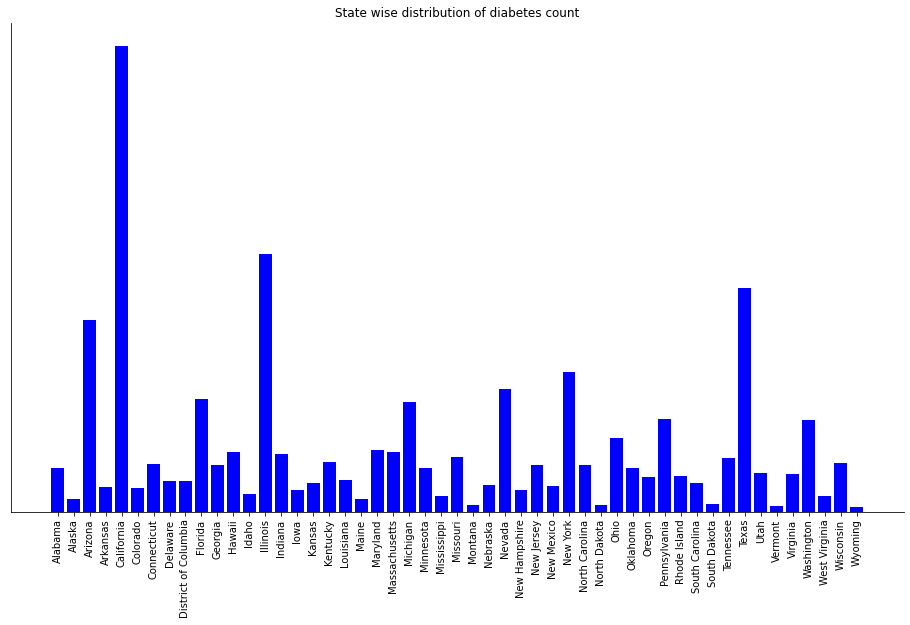

In [20]:
plt.rcParams["figure.figsize"] = [16,9]
plt.bar("State","Diabetes_Number", data = mydata, color = "blue")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('State wise distribution of diabetes count')
plt.xticks(rotation = 90)
plt.yticks([])
plt.show()

There are 3,220 records (each record represents a county) and 95 features in the dataframe.

In [21]:
x = mydata["Diabetes_Number"]
y = mydata["Obesity_Number"]
z = mydata["race_total population"]

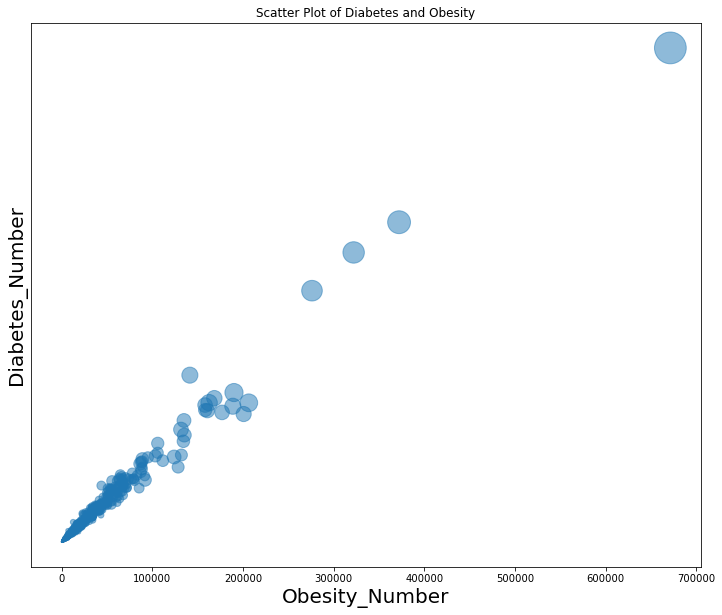

In [22]:
plt.rcParams["figure.figsize"] = [12,10]
plt.scatter(x, y, s = z/10000, alpha=0.5)
plt.xlabel('Obesity_Number', size=20)
plt.ylabel('Diabetes_Number', size=20)
plt.title('Scatter Plot of Diabetes and Obesity')
plt.yticks([])
plt.show()

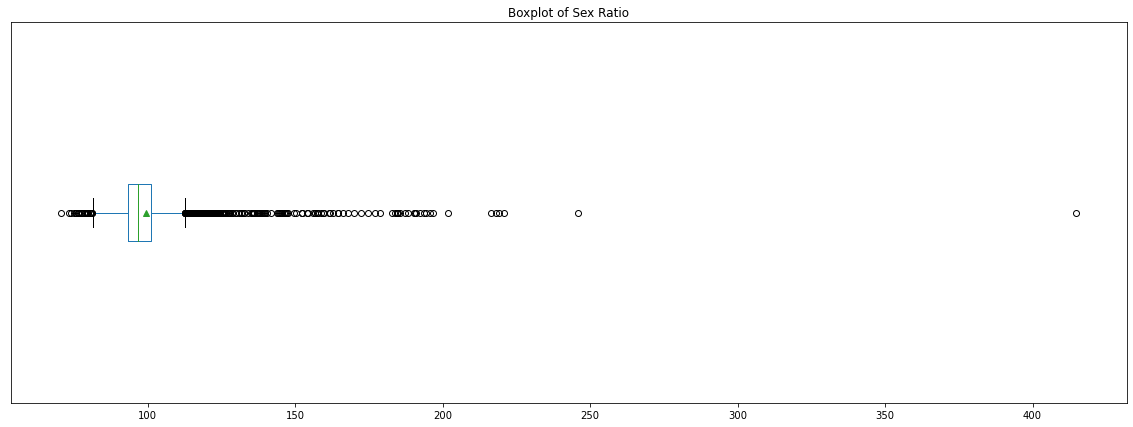

In [41]:
plt.rcParams["figure.figsize"] = [20,7]
boxplot = mydata.boxplot(column=[ "sex and age_total population_18 years and over_sex ratio (males per 100 females)"], vert=False, showmeans=True, grid=False)
boxplot.set_title("Boxplot of Sex Ratio")
plt.yticks([])
plt.show()

## Section 3

### 3.1 Clean Data

_Remove any features that should not be used in the analysis (for instance, county
name), transform categorical features so they can be used in a machine learning
pipeline, and conduct any other steps necessary to prepare the data for fitting
models._

In [8]:
mydata.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [9]:
# remove features not used in analysis -- county name, state name
mydata = mydata.drop(['County', 'State'], axis = 1)

In [10]:
# there were sneaky values in here that were making many cols non-numeric
mydata = mydata.apply(pd.to_numeric, errors = 'coerce')

Normalize all columns (except CountyFIPS, an id column) by total population.

In [11]:
mydata_norm = mydata.drop(['CountyFIPS','race_total population'], axis = 1).div(mydata['race_total population'], axis='index')
# add back in CountyFIPS and total population
mydata_norm['CountyFIPS'] = mydata['CountyFIPS']
mydata_norm['race_total population'] = mydata['race_total population']

Visualize the distribution of county diabetes rate.

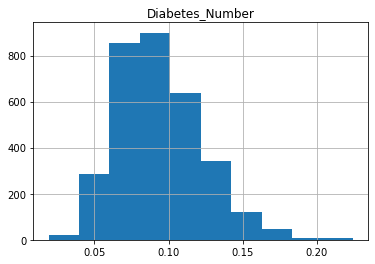

In [12]:
# this produces a county diabetes rate, whose distribution we now visualize
mydata_norm.hist(column='Diabetes_Number')
plt.show() #added this to get rid of the array text on top of the chart

Create a binary variable identifying counties with diabetes rates that are above average. This is what we will predict.

In [13]:
# predict counties with diabetes rates in the top quartile of diabetes rates
mydata_norm['diabetes_top_quartile'] = np.where(mydata_norm['Diabetes_Number'] > np.nanquantile(mydata_norm['Diabetes_Number'], q=0.75), 1, 0)
mydata_norm = mydata_norm.dropna(axis=0, how='any')
# remove race total column, which was breaking logreg model
mydata_norm = mydata_norm.drop('race_total population', axis=1)
mydata_norm.head()

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,CountyFIPS,diabetes_top_quartile
0,0.093804,0.244366,0.226902,0.001386,0.981341,0.018659,0.981341,0.768786,0.191395,0.002880,...,0.145833,0.757808,0.363297,0.394511,0.001668,0.145833,0.063188,0.082645,1001,0
1,0.080281,0.233255,0.192324,0.000416,0.982836,0.017164,0.982836,0.862662,0.094970,0.007314,...,0.195404,0.780512,0.375307,0.405205,0.000445,0.195404,0.090675,0.104730,1003,0
2,0.131875,0.310643,0.210651,0.002956,0.986308,0.013692,0.986308,0.473819,0.475758,0.002793,...,0.179738,0.789155,0.423668,0.365488,0.004495,0.179738,0.077729,0.102009,1005,1
3,0.105251,0.290052,0.258667,0.003573,0.991699,0.008301,0.991699,0.766547,0.222755,0.000355,...,0.162516,0.793182,0.425179,0.368003,0.005127,0.162516,0.072491,0.090025,1007,0
4,0.108977,0.246804,0.249198,0.001383,0.983780,0.016220,0.983780,0.955052,0.014954,0.002446,...,0.177518,0.766363,0.374621,0.391743,0.001658,0.177518,0.078758,0.098760,1009,0


### 3.2 Partition Data

_Partition the data into train, validation, and test sets. Explain your choice of how much data to include in each set, and the tradeoffs involved with differing sizes in each set. Also describe the purpose of each set._

In [14]:
y = mydata_norm['diabetes_top_quartile'] # assign predicted variable
X = mydata_norm.drop(['Diabetes_Number','diabetes_top_quartile'], axis = 1) # assign the rest as predictors

In [15]:
from sklearn.model_selection import train_test_split

# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.70, test_size=0.30)

In [16]:
# check
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X train is (2178, 91)
Shape of y_train is (2178,)
Shape of X_test is (934, 91)
Shape of y_test is (934,)


We select a training set size of 70% because we do not expect to include very many features in our model. Therefore, because the model is not too complex, we do not believe we need a particularly large training set.

### 3.3 Feature Selection

_Investigate whether there are any features that you should remove prior to model fitting. For example, you might investigate whether there are highly correlated features or features with low variance. You may also consider using plots and relationships you found in the EDA stage for this question._

First, to take a peek, we look at all column names.

In [17]:
print(X_train.columns.values)

['Obesity_Number' 'Physical_Inactivity_Number'
 'sex and age_total population_65 years and over_sex ratio (males per 100 females)'
 'race_total population_one race'
 'race_total population_two or more races'
 'race_total population_one race_1' 'race_total population_one race_white'
 'race_total population_one race_black or african american'
 'race_total population_one race_american indian and alaska native'
 'race_total population_one race_american indian and alaska native_cherokee tribal grouping'
 'race_total population_one race_american indian and alaska native_chippewa tribal grouping'
 'race_total population_one race_american indian and alaska native_navajo tribal grouping'
 'race_total population_one race_american indian and alaska native_sioux tribal grouping'
 'race_total population_one race_asian'
 'race_total population_one race_asian_asian indian'
 'race_total population_one race_asian_chinese'
 'race_total population_one race_asian_filipino'
 'race_total population_one race

We have features that describe rates of males and females in a given county. Commonsensically, we will need to drop features that describe either males or females, because each implicitly describes the other -- these are rates with only two possible values. We will drop columns labeled "female."

In [18]:
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='female')))]

To be safe, we then create a correlation matrix and use it to drop any features with correlation greater than 0.8.

In [19]:
# create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
X_train.drop(to_drop, axis=1, inplace=True)

Then, we drop features with low variance.

In [20]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(X_train)

array([[3.44657736e-01, 2.35395664e-01, 9.77213092e-01, ...,
        1.23601712e-02, 8.42425079e-04, 2.20950000e+04],
       [2.26699601e-01, 1.29547753e-01, 9.65191379e-01, ...,
        1.48397541e-02, 9.03871583e-05, 2.70370000e+04],
       [2.89733639e-01, 2.75754101e-01, 9.89460222e-01, ...,
        1.21273593e-02, 1.86099841e-03, 2.11330000e+04],
       ...,
       [2.56629132e-01, 2.08136578e-01, 8.90119869e-01, ...,
        1.85252452e-02, 6.52015983e-03, 2.70870000e+04],
       [2.68293037e-01, 2.69760549e-01, 9.78016390e-01, ...,
        1.77554342e-02, 6.01534348e-04, 1.32950000e+04],
       [1.91948851e-01, 1.34346592e-01, 9.72946901e-01, ...,
        2.01736412e-02, 1.23224684e-04, 2.61390000e+04]])

Next, we create a validation set, so that we can save the use of our test set until the end of our analysis. The validation set will be used to move iteratively between train and validation as we tweak our model. Splitting the training data again, we'll have a final split of 60-20-20, train-validation-test.

In [21]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [22]:
# check dimensions
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of y_validate is", y_validate.shape)

Shape of X train is (1633, 51)
Shape of y_train is (1633,)
Shape of X_validate is (545, 51)
Shape of y_validate is (545,)


## Section 4

### 4.1 Model Descriptions

_Choose 5 different machine learning techniques. Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem._
Note: We also incorporate validation (part 5.1) and feature selection (part 5.2) during this stage.

#### 4.1.1 Logistic Regression

Because we have a classification problem, we will start with a logistic regression to fit our first model. It is a great place to start as it is one of the most commonly used models for classification problems and fairly easy to compute and interpret. Importantly, it fits a linear regression then ensures that probabilities do not go above 1 or below 0. Because of this, it will not capture nonlinear relationships.

In [23]:
#Defining RMSE
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [24]:
#Check to make sure there are both 0 and 1 in train y
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1266,  367]))

In [25]:
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix

# create a model
log_reg = LogisticRegression()

# fit the model
log_model = log_reg.fit(X_train.drop('CountyFIPS', axis = 1), y_train)

y_pred = log_model.predict(X_validate.drop('CountyFIPS', axis = 1))

# this runs the following ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# I tried running X_train = np.nan_to_num(X_train) but didn't work
# I also tried checking for NAN and infinity values for X_train: X_train.isinf().values.any() but also got errors

Now we'd like to visualize how the model performed with a confusion matrix.

In [26]:
#Check to make sure there are both 0 and 1 in predicted y
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([507,  38]))

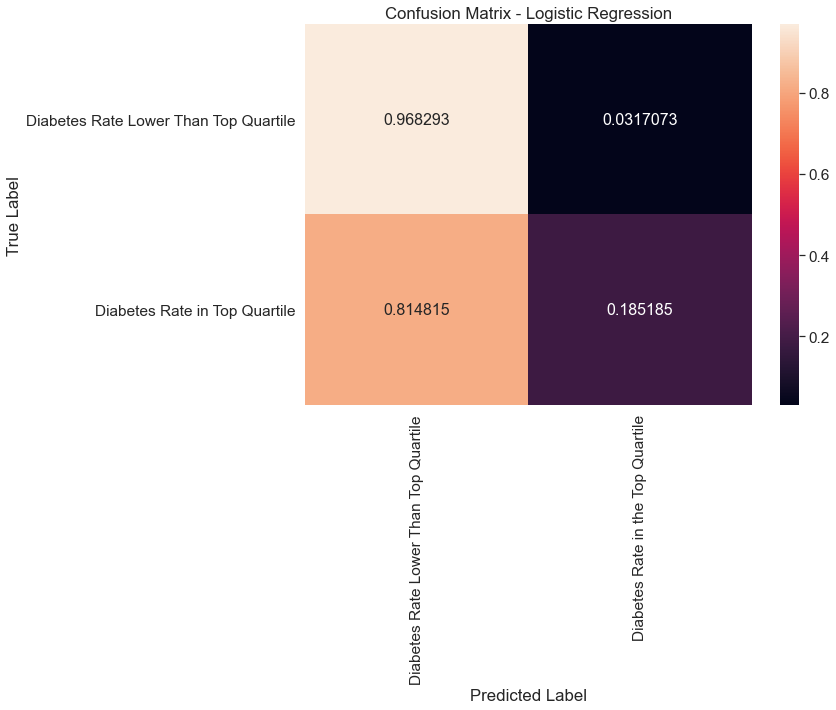

In [27]:
import seaborn as sns

cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Diabetes Rate Lower Than Top Quartile", 1: "Diabetes Rate in the Top Quartile"})
df_cm.index = ["Diabetes Rate Lower Than Top Quartile", "Diabetes Rate in Top Quartile"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

As shown in the confusion matrix above, the model correctly predicts counties with diabetes rates in the bottom 3/4th of the distribution 96.8% of the time. But it only correctly predicts counties in the top quantile 18.5% of the time. The other 81.5% of the time, it is incorrectly assigning counties with high diabetes rates as those in the bottom 75% of the distribution.

In [28]:
# we get a long list of warnings after running this code chunk so i am going to disable them first
import warnings
warnings.filterwarnings('ignore')

# now for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(.1, 1, .1),
              'fit_intercept': ['True', 'False'],
              'solver': ['liblinear', 'sag', 'saga']
             }

log_grid_reg = GridSearchCV(log_reg, param_grid, cv=3, iid=False)
log_grid_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)

best_index = np.argmax(log_grid_reg.cv_results_["mean_test_score"])
best_log_pred = log_grid_reg.best_estimator_.predict(X_validate.drop('CountyFIPS', axis=1))

print(log_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(log_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', log_grid_reg.score(X_validate.drop('CountyFIPS', axis=1), y_validate))
print('Validation RMSE', rmse(best_log_pred, y_validate))

{'C': 0.1, 'fit_intercept': 'True', 'solver': 'sag'}
Best CV R^2: 0.8083243389098759
Validation R^2: 0.7724770642201835
Validation RMSE 0.47699364333271416


In [29]:
#Feature selection
best_log_coef = log_grid_reg.best_estimator_.coef_.flatten()
best_log_reg_data = pd.DataFrame([best_log_coef, X_train.columns]).T
best_log_reg_data.columns = ['Coefficient', 'Feature']
best_log_reg_data
best_log_reg_data = best_log_reg_data.dropna(axis=0, how='any')
best_log_reg_data = best_log_reg_data.dropna()
best_log_reg_data = best_log_reg_data.where(abs(best_log_reg_data.Coefficient) > np.quantile(abs(best_log_reg_data['Coefficient']), q=0.2))

#### 4.1.2 Ridge Regression

Next up will be the ridge regression, which has some advantages over the linear regression. It penalizes the estimates, particularly for features with a very large beta coefficient. This can help us to narrow in on some of the most important features for our model. Importantly, unlike the LASSO, it does not reduce coefficients to zero.

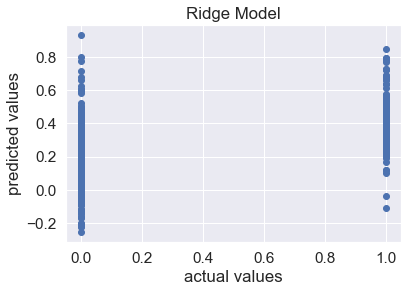

In [30]:
# make and fit a Ridge regression model
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X_train.columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']

# use the model to make predictions
ridge_pred = ridge_model.predict(X_validate.drop('CountyFIPS', axis=1))

# plot the predictions
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

Hyperparameter tuning the ridge model

In [31]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate.drop('CountyFIPS', axis=1))

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate.drop('CountyFIPS', axis=1), y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

{'alpha': 0.2, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'auto'}
Best CV R^2: 0.28217279400099393
Validation R^2: 0.2975591371896992
Validation RMSE 0.3617988600571114


Because this is our best-performing model (as you will see below), we take the additional step of selecting the most important features. Specifically, we remove the 20% of coefficients with the lowest absolute values, and then retune the Ridge model using only those features. This re-estimated model will subsequently be used on the test data.

In [32]:
#Feature selection
best_ridge_coef = ridge_grid_reg.best_estimator_.coef_.flatten()
best_ridge_reg_data = pd.DataFrame([best_ridge_coef, X_train.columns]).T
best_ridge_reg_data.columns = ['Coefficient', 'Feature']
best_ridge_reg_data = best_ridge_reg_data.dropna(axis=0, how='any')
best_ridge_reg_data = best_ridge_reg_data.where(abs(best_ridge_reg_data.Coefficient) > np.quantile(abs(best_ridge_reg_data['Coefficient']), q=0.2))
best_ridge_reg_data = best_ridge_reg_data.dropna()
#best_ridge_to_drop = best_ridge_reg_data.where(abs(best_ridge_reg_data.Coefficient) <= np.quantile(abs(best_ridge_reg_data['Coefficient']), q=0.2))
#best_ridge_to_drop = best_ridge_to_drop.dropna()

In [33]:
best_vars = best_ridge_reg_data["Feature"].tolist()
X_train_filter = X_train[best_vars]

param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train_filter, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_train_filter)

#### 4.1.3 LASSO Regression

Following the ridge, we run a LASSO regression. Similarly to the ridge, it also penalizes features. But it actually forces some of them to be zero. As mentioned earlier, this can help us to narrow in on some of the most important features for our model.

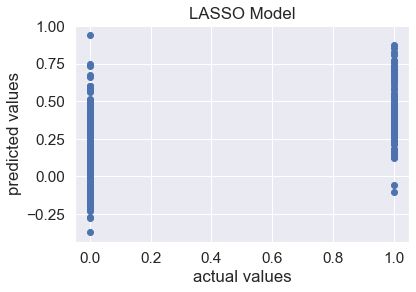

In [34]:
# create and fit the model
lasso_reg = Lasso(max_iter=10000, alpha=0.0005)  

lasso_model = lasso_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X_train.columns]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']

# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate.drop('CountyFIPS', axis=1))

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

Comparing Ridge and LASSO coefficients

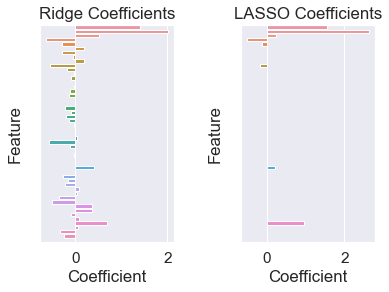

In [35]:
figure = plt.figure()
figure.subplots_adjust(wspace = .5, hspace=.5)
figure.add_subplot(1, 2, 1)
sns.barplot(x="Coefficient", y="Feature", data=ridge_reg_data).set_title("Ridge Coefficients")
plt.yticks(y, " ")
figure.add_subplot(1, 2, 2)
sns.barplot(x="Coefficient", y="Feature", data=lasso_reg_data).set_title("LASSO Coefficients")
plt.yticks(y, " ")
plt.show()

Hyperparameter tuning the LASSO model

In [36]:
param_grid = {'alpha': np.arange(0.0001, 0.001, 0.0001),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

{'alpha': 0.0002, 'fit_intercept': 'False', 'normalize': 'False', 'selection': 'random'}
Best CV R^2: 0.28193026651330216
Validation R^2: 0.2965166080373576
Validation RMSE 0.3620672428009889


In [37]:
#Feature selection
best_lasso_coef = lasso_grid_reg.best_estimator_.coef_.flatten()
best_lasso_reg_data = pd.DataFrame([best_lasso_coef, X_train.columns]).T
best_lasso_reg_data.columns = ['Coefficient', 'Feature']
best_lasso_reg_data = best_lasso_reg_data.dropna(axis=0, how='any')
best_lasso_reg_data = best_lasso_reg_data.where(abs(best_lasso_reg_data.Coefficient) > np.quantile(abs(best_lasso_reg_data['Coefficient']), q=0.2))
best_lasso_reg_data = best_lasso_reg_data.dropna()
best_lasso_reg_data

,Coefficient,Feature
0,1.47969,Obesity_Number
1,2.48483,Physical_Inactivity_Number
2,0.785186,race_total population_one race
3,-0.518977,race_total population_one race_white
6,-0.478185,race_total population_one race_american indian...
10,-0.441079,race_total population_one race_asian_asian indian
15,-4.88652,race_total population_one race_asian_vietnamese
16,-0.236337,race_total population_one race_asian_other asian
17,-4.53481,race_total population_one race_native hawaiian...
21,-0.489719,race_total population_two or more races_white ...


#### 4.1.4 SVM

Our fourth ML technique is the support vector classifier. One of the benefits of this particular model given our large number of features (including many that are close to 0) is that it is fairly effective in high dimensional spaces that are sparse. One downfall, however, is that it is more a "black box" technique. We do not really know much about what is happening "under the hood" and there is no probabilistic explanation for the classifying hyperplane.

In [38]:
from sklearn import svm

# make and fit a SVM
svm = svm.SVC()
svc_model = svm.fit(X_train.drop('CountyFIPS', axis=1), y_train)
#svc_data = pd.DataFrame([svc_model.coef_, X_train.columns]).T
#svc_data.columns = ['Coefficient', 'Feature']

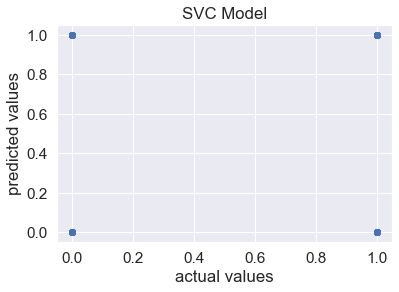

In [39]:
# use the model to make predictions
svc_pred = svc_model.predict(X_validate.drop('CountyFIPS', axis=1))

# plot the predictions
plt.scatter(y_validate, svc_pred)
plt.title('SVC Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

Hypertuning the SVM

In [40]:
param_grid = {'C': np.arange(.1, 1, .1),
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False],
             #'probability': [True, False],
             'decision_function_shape': ['ovo', 'ovr']}

svc_grid_reg = GridSearchCV(svc_model, param_grid, cv=3, iid=False)
svc_grid_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)

best_index = np.argmax(svc_grid_reg.cv_results_["mean_test_score"])
best_svc_pred = svc_grid_reg.best_estimator_.predict(X_validate.drop('CountyFIPS', axis=1))

print(svc_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(svc_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', svc_grid_reg.score(X_validate.drop('CountyFIPS', axis=1), y_validate))
print('Validation RMSE', rmse(best_svc_pred, y_validate))

{'C': 0.9, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}
Best CV R^2: 0.8009803921568627
Validation R^2: 0.7743119266055046
Validation RMSE 0.47506638840744714


#### 4.1.5 Decision Trees

Like many of the previous models, decisions trees are a go-to ML technique for many classification problems. With trees, each node of the tree representation symbolizes an attribute and each leaf denotes a class label. One con associated with this method, however, is that feature values are preferred to be categorical but nearly all of our features are continous.

In [41]:
from sklearn import tree

dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-07, random_state=10)

See how it performs:

In [42]:
print(dt_classifier.score(X_train, y_train))
print(dt_classifier.score(X_validate, y_validate))

1.0
0.7614678899082569


In [43]:
param_grid = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'max_depth': [None, 1, 2, 3],
             'min_samples_split': np.arange(2, 5, 1),
             'min_samples_leaf': np.arange(2, 5, 1)}

dt_grid_reg = GridSearchCV(dt_classifier, param_grid, cv=3, iid=False)
dt_grid_reg.fit(X_train.drop('CountyFIPS', axis=1), y_train)

best_index = np.argmax(dt_grid_reg.cv_results_["mean_test_score"])
best_svc_pred = dt_grid_reg.best_estimator_.predict(X_validate.drop('CountyFIPS', axis=1))

print(dt_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(dt_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', dt_grid_reg.score(X_validate.drop('CountyFIPS', axis=1), y_validate))
print('Validation RMSE', rmse(best_svc_pred, y_validate))

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best CV R^2: 0.8181136445403849
Validation R^2: 0.7743119266055046
Validation RMSE 0.47506638840744714


## Section 5

Because we incorporated Sections 5.1 and 5.2 in the previous section, we now move to predicting our best model on the test set. The ridge and LASSO models performed the best but the ridge regression had a slightly lower validation RMSE so we select this model. Again, the ridge model trades some bias for lower variance by shrinking the magnitude of the coefficients towards zero.

### 5.3: Test Set

In [44]:
#X_test = X_test[X_train.columns.values.tolist()]
best_vars = best_ridge_reg_data["Feature"].tolist()
X_test_filter = X_test[best_vars]

best_pred = ridge_grid_reg.best_estimator_.predict(X_test_filter)
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Test R^2:', ridge_grid_reg.score(X_test_filter, y_test))
print('Test RMSE', rmse(best_pred, y_test))


Best CV R^2: 0.2848767880704883
Test R^2: 0.21112147006116733
Test RMSE 0.37689349197571786


Now creating a confusion matrix to see how our model performed on the test set.

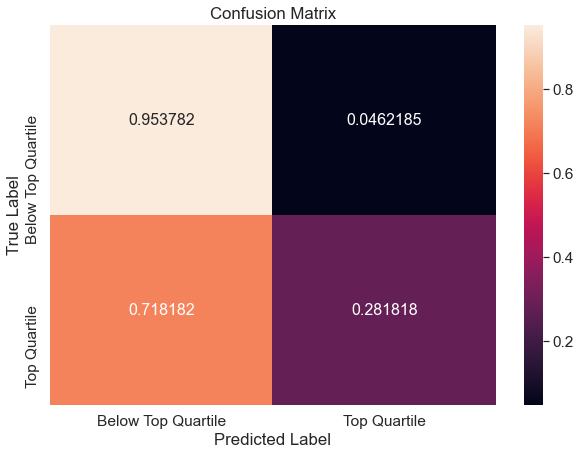

In [45]:
# first turning our predictions into a binary variable
best_pred_bin = best_pred
best_pred_bin = np.where(best_pred>0.5, 1, 0) 

cf_matrix = confusion_matrix(y_test, best_pred_bin, normalize = "true")


df_cm = pd.DataFrame(cf_matrix, range(2),
              range(2))

df_cm = df_cm.rename(index=str, columns={0: "Below Top Quartile", 1: "Top Quartile"})
df_cm.index = ["Below Top Quartile", "Top Quartile"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

_Evaluate your performance on this test set. What is the advantage of using both validation and test sets in the social sciences and public policy?_

The model actually performed surprisingly well. Beginning first with the RMSE: The validation RMSE for our ridge regression was 0.362. And running our best ridge model on the test data gives us just a slightly higher RMSE (which we expect) of 0.376. The confusion matrix shows that our model is pretty good at predicting counties that are _not_ among the top quartile (which makes sense because this is 75% of the full sample), but it only correctly predicts counties with a diabetes rate in the top quartile 28% of the time.

The advantage of using both validation and test sets is that we have the opportunity to better tune the models and select one that would perform well out of sample. Model selection is informed by the validation set because it allows us to test the model we built with our training data on a new set of data. The final test set, which we use only once with our best model, is the one we would share with the policymaker who tasked us with this question.

Finally, the benefit of data splitting for the social sciences and public policy is that it generates more consistent predictions. If we were to just run each of these regressions on the full sample, it would also be much more difficult to compare and contrast how well the models perform because we have already used up all of our data.

### 5.4 Cross-Validation

Cross-validation involves dividing the sample into k number of folds (e.g., subsamples) and testing which model best predicts the final fold. The more folds, the more samples we have to average the errors and find the best model. But the tradeoff is that every additional number of folds reduces the sample size of each fold significantly--sacrificing bias. James et al. (2013:184) recommends performing k-fold cross-validation using k = 5 or k = 10, "as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.” Because are sample is that large, we opt for dividing it into 5 folds.

Cross-validation, unlike splitting, has the advantage of allowing every data point to be in the test set once. Splitting the dataset, on the other hand, means a random subset of the sample will be in train, another subset in validation, and yet a third in test. By averaging the errors in cross-validation, the model is less sensitive to variation in the random samples, and is also less prone to overfitting. 

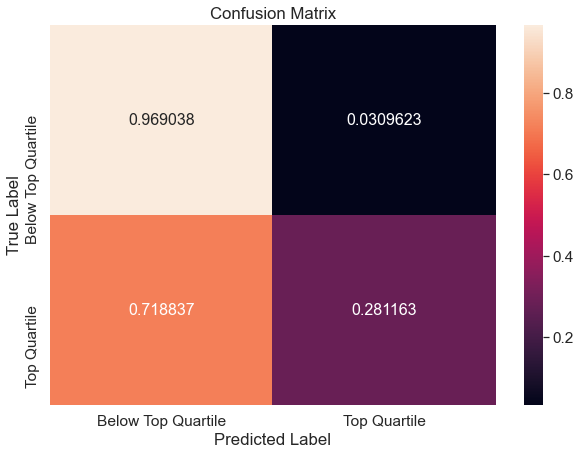

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

y = mydata_norm['diabetes_top_quartile'] 
X = mydata_norm.drop(['Diabetes_Number','diabetes_top_quartile'], axis = 1)

best_model = ridge_grid_reg.best_estimator_

ridge_pred = cross_val_predict(best_model, X, y, cv = 5)

# prevent error in the confusion matrix, we turn these predictions into a binary variable
ridge_pred_bin = ridge_pred
ridge_pred_bin = np.where(ridge_pred>0.5, 1, 0) 

cf_matrix = confusion_matrix(y, ridge_pred_bin, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
              range(2))

df_cm = df_cm.rename(index=str, columns={0: "Below Top Quartile", 1: "Top Quartile"})
df_cm.index = ["Below Top Quartile", "Top Quartile"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

_Evaluate the results. How did cross-validation do compared to the train/validation/test
split?_

Although our model is still not great at correctly identifying the counties with the highest diabetes rate (i.e. it correctly assigns counties in the top quartile of diabetes rates just 28 percent of the time), it is a big improvement from the first logistic regression (which correctly predicted those in the top quartile just 18.5 percent of the time). Our cross-validation results are also very similar to our test results (both correctly predicted our outcome 28 percent of the time). Even if this is not a great true positivity rate, it is nearly 150% higher than the original model done on the training data with a logistic regression.


In [54]:
# rebuilding our dataset to identify counties that our model predicts

# transforming arrays into series
best_pred_series = pd.Series(best_pred)
best_pred_bin_series = pd.Series(best_pred_bin)

# create a dictonary of outcome variables 
outcome = {"ridge_pred": best_pred_series, 
           "ridge_pred_binary": best_pred_bin_series}

# Concatenating the series side by side as depicted by axis=1 
df = pd.concat(outcome, 
               axis = 1)

# adding the diabetes rate
diabetes_rate = mydata_norm[['Diabetes_Number']]
diabetes_rate
df = diabetes_rate.merge(df, left_index=True, right_index=True)
  
# getting geo identifiers by reloading original data
mydata = pd.read_csv("Diabetes with Population Info by County 2017.csv")

# merging dataframes on index of both the dataframes
merged_df = mydata.merge(df, left_index=True, right_index=True)
merged_df

,County,State,CountyFIPS,Diabetes_Number_x,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,Diabetes_Number_y,ridge_pred,ridge_pred_binary
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,41831,20054,21777,92.1,8050,3488,4562,0.093804,0.401104,0
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,162430,78104,84326,92.6,40665,18870,21795,0.080281,0.585037,1
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,20346,10923,9423,115.9,4634,2004,2630,0.131875,0.130740,0
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,17868,9578,8290,115.5,3661,1633,2028,0.105251,0.143070,0
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,44177,21595,22582,95.6,10233,4540,5693,0.108977,0.173611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,Hodgeman County,Kansas,20083,214,538,356,83.8,1842,1820,22,...,1451,728,723,100.7,421,192,229,0.116178,0.254745,0
930,Jackson County,Kansas,20085,1427,3710,2470,86.5,13318,12723,595,...,10005,4962,5043,98.4,2477,1149,1328,0.107148,0.317598,0
931,Jefferson County,Kansas,20087,1558,5058,2833,94.8,18888,18380,508,...,14501,7277,7224,100.7,3434,1671,1763,0.082486,0.253741,0
932,Jewell County,Kansas,20089,274,685,569,90.4,2916,2887,29,...,2370,1201,1169,102.7,849,403,446,0.093964,-0.035892,0
